# Credit card default behavior


###### Objective:analyzing credit card default behavior and building predictive models to assess credit risk

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import os,sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score, f1_score, roc_auc_score,roc_curve


In [ ]:
import pandas as pd

df=pd.read_csv(r'/UCI_Credit_Card.csv',index_col='ID')

In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


# Data Description

## Attribute Information

The dataset used for this research consists of a binary response variable, default payment, with values (Yes = 1, No = 0). The study utilizes the following 23 explanatory variables:

1. *ID:* ID of each client.



2. *LIMIT_BAL:* Amount of given credit (NT) dollars, including individual and family/supplementary credit.


3. *SEX:* Gender of the client (1 = male, 2 = female).


4. *EDUCATION:* Education level of the client (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).


5. *MARRIAGE:* Marital status of the client (1 = married, 2 = single, 3 = others).


6. *AGE:* Age of the client in years.


7. *PAY_0:* Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, … 8 = payment delay for eight months, 9 = payment delay for nine months and above).


8. *PAY_2:* Repayment status in August 2005 (scale same as above).


9. *PAY_3:* Repayment status in July 2005 (scale same as above).


10. *PAY_4:* Repayment status in June 2005 (scale same as above).


11. *PAY_5:* Repayment status in May 2005 (scale same as above).


12. *PAY_6:* Repayment status in April 2005 (scale same as above).


13. *BILL_AMT1:* Amount of bill statement in September 2005 (NT dollar).


14. *BILL_AMT2:* Amount of bill statement in August 2005 (NT dollar).


15. *BILL_AMT3:* Amount of bill statement in July 2005 (NT dollar).


16. *BILL_AMT4:* Amount of bill statement in June 2005 (NT dollar).


17. *BILL_AMT5:* Amount of bill statement in May 2005 (NT dollar).


18. *BILL_AMT6:* Amount of bill statement in April 2005 (NT dollar).


19. *PAY_AMT1:* Amount of previous payment in September 2005 (NT dollar).


20. *PAY_AMT2:* Amount of previous payment in August 2005 (NT dollar).


21. *PAY_AMT3:* Amount of previous payment in July 2005 (NT dollar).


22. *PAY_AMT4:* Amount of previous payment in June 2005 (NT dollar).


23. *PAY_AMT5:* Amount of previous payment in May 2005 (NT dollar).


24. *PAY_AMT6:* Amount of previous payment in April 2005 (NT dollar).


25. *default.payment.next.month:* Default payment (1 = yes, 0 = no).


This dataset provides valuable information for analyzing credit card default behavior and building predictive models to assess credit risk.



In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

### Data Cleaning

In [ ]:
df.duplicated().sum()

35

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df.rename(columns={'default.payment.next.month':'isdefaulter'},inplace=True)

In [ ]:
df['SEX'].value_counts()    #1 = male, 2 = female

2    18091
1    11874
Name: SEX, dtype: int64

In [ ]:
df['EDUCATION'].value_counts()   #1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'].value_counts()   #1 = married, 2 = single, 3 = others

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df['isdefaulter'].value_counts()  #Yes = 1, No = 0

0    23335
1     6630
Name: isdefaulter, dtype: int64

## EDA

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isdefaulter
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df['LIMIT_BAL'].skew()

0.9934913272313394

<Axes: xlabel='SEX', ylabel='count'>

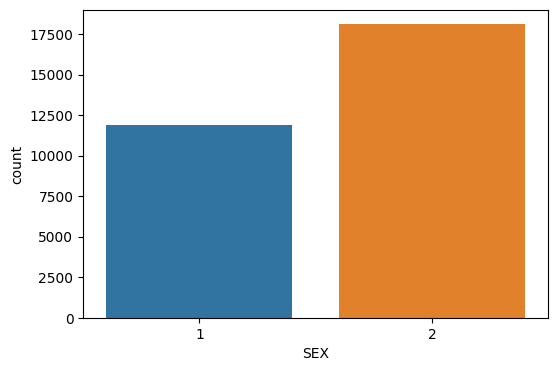

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEX',data=df)

<Axes: xlabel='EDUCATION', ylabel='count'>

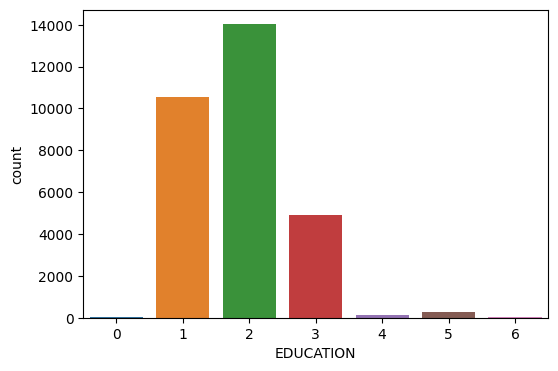

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='EDUCATION',data=df)

<Axes: xlabel='MARRIAGE', ylabel='count'>

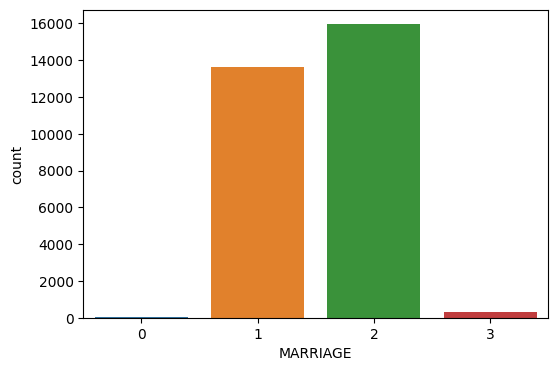

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='MARRIAGE',data=df)

<Axes: xlabel='SEX', ylabel='count'>

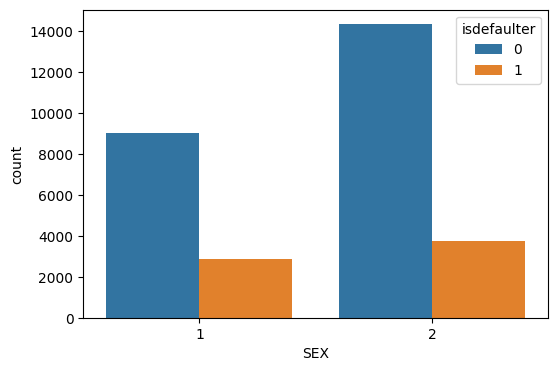

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SEX',hue='isdefaulter',data=df)

In [ ]:
df['isdefaulter'].value_counts(normalize=True)*100

0    77.874187
1    22.125813
Name: isdefaulter, dtype: float64

In [ ]:
df['EDUCATION'].value_counts(normalize=True)*100

2    46.784582
1    35.251126
3    16.402470
5     0.934423
4     0.410479
6     0.170199
0     0.046721
Name: EDUCATION, dtype: float64

In [ ]:
df['MARRIAGE'].value_counts(normalize=True)*100

2    53.212081
1    45.529785
3     1.077924
0     0.180210
Name: MARRIAGE, dtype: float64

In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace([5, 6, 0], 4)

In [ ]:
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].replace([ 0],3)

###### Plotting categorical feature

In [ ]:
cat_features=['SEX', 'EDUCATION', 'MARRIAGE']
df_cat=df[cat_features]

In [ ]:
df_cat['Defaulter'] = df['isdefaulter'].copy()

In [ ]:
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulter
ID,,,,
1,2,2,1,1
2,2,2,2,1
3,2,2,2,0
4,2,2,1,0
5,1,2,1,0
...,...,...,...,...
29996,1,3,1,0
29997,1,3,2,0
29998,1,2,2,1


In [ ]:
pd.crosstab(df_cat['SEX'],df_cat['Defaulter'])

Defaulter,0,1
SEX,,
1,9005,2869
2,14330,3761


In [ ]:
pd.crosstab(df_cat['SEX'],df_cat['Defaulter'],normalize='index')

Defaulter,0,1
SEX,,
1,0.758380,0.241620
2,0.792107,0.207893


In [ ]:
df_cat.replace({'SEX': {1: 'MALE', 2: 'FEMALE'},
                'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'},
                'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace=True)


In [ ]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
ID,,,,
1,FEMALE,university,married,1
2,FEMALE,university,single,1
3,FEMALE,university,single,0
4,FEMALE,university,married,0
5,MALE,university,married,0


In [ ]:
cat_features=df_cat.columns.values

<Figure size 1000x500 with 0 Axes>

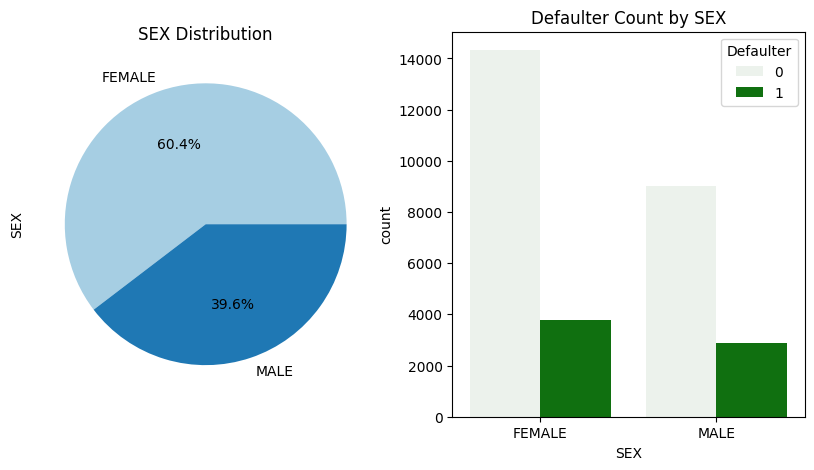

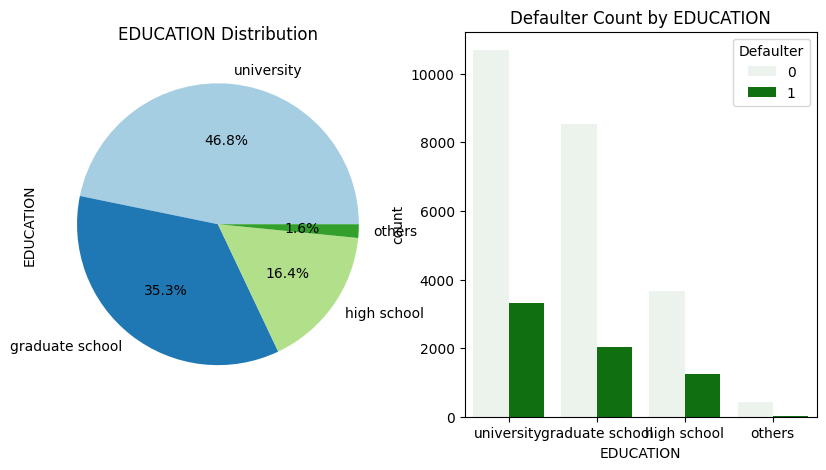

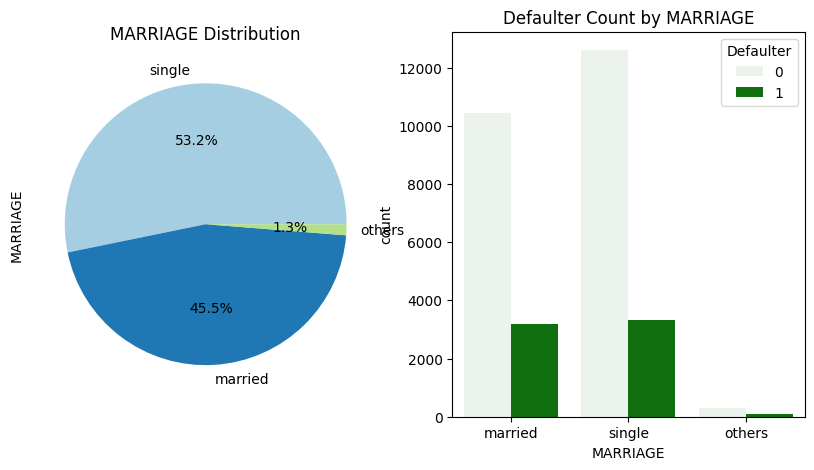

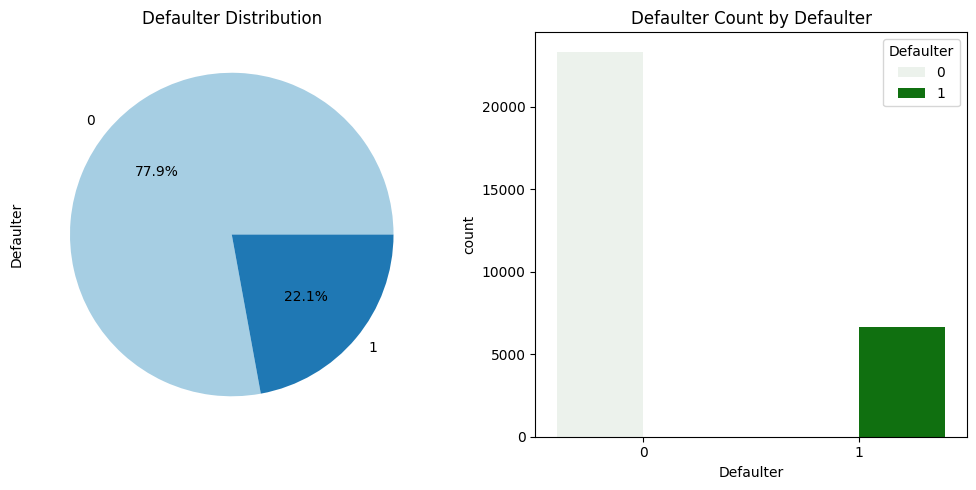

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Paired')
plt.figure(figsize=(10, 5))
grid = plt.GridSpec(1, 3, wspace=0.4)

for col in cat_features:
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

    # Pie chart
    df_cat[col].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
    axes[0].set_title(f'{col} Distribution')

    # Count plot
    sns.countplot(x=col, hue='Defaulter', data=df_cat, color='green', ax=axes[1])
    axes[1].set_title(f'Defaulter Count by {col}')

plt.tight_layout()
plt.show()


###### Limit Balance

In [ ]:
df['LIMIT_BAL'].max()

1000000.0

In [ ]:
df['LIMIT_BAL'].min()

10000.0

In [ ]:
df['LIMIT_BAL'].describe()

count      29965.000000
mean      167442.005006
std       129760.135222
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

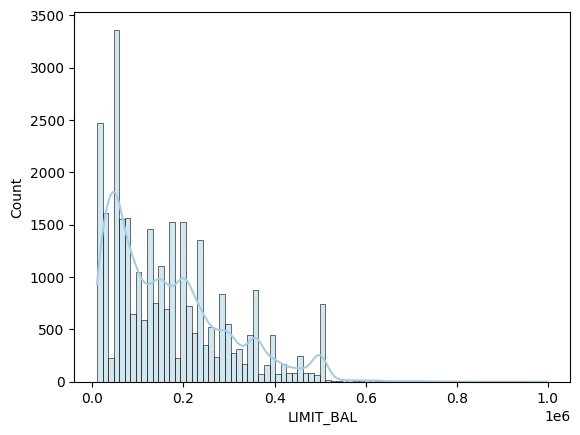

In [ ]:
sns.histplot(df['LIMIT_BAL'],kde=True)

<Axes: xlabel='isdefaulter', ylabel='LIMIT_BAL'>

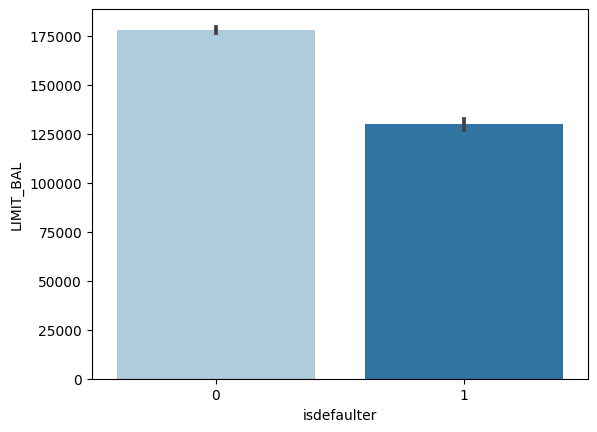

In [ ]:
sns.barplot(x='isdefaulter',y='LIMIT_BAL',data=df)

<Axes: xlabel='isdefaulter', ylabel='LIMIT_BAL'>

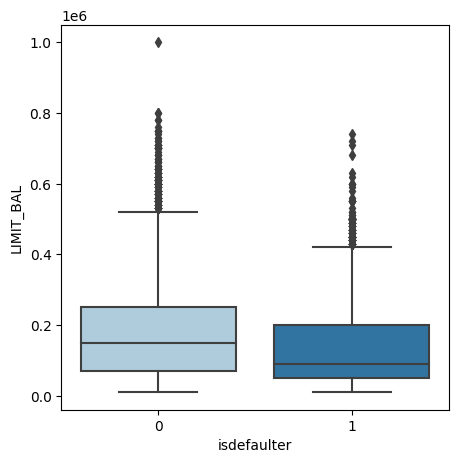

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x='isdefaulter',y='LIMIT_BAL',data=df)

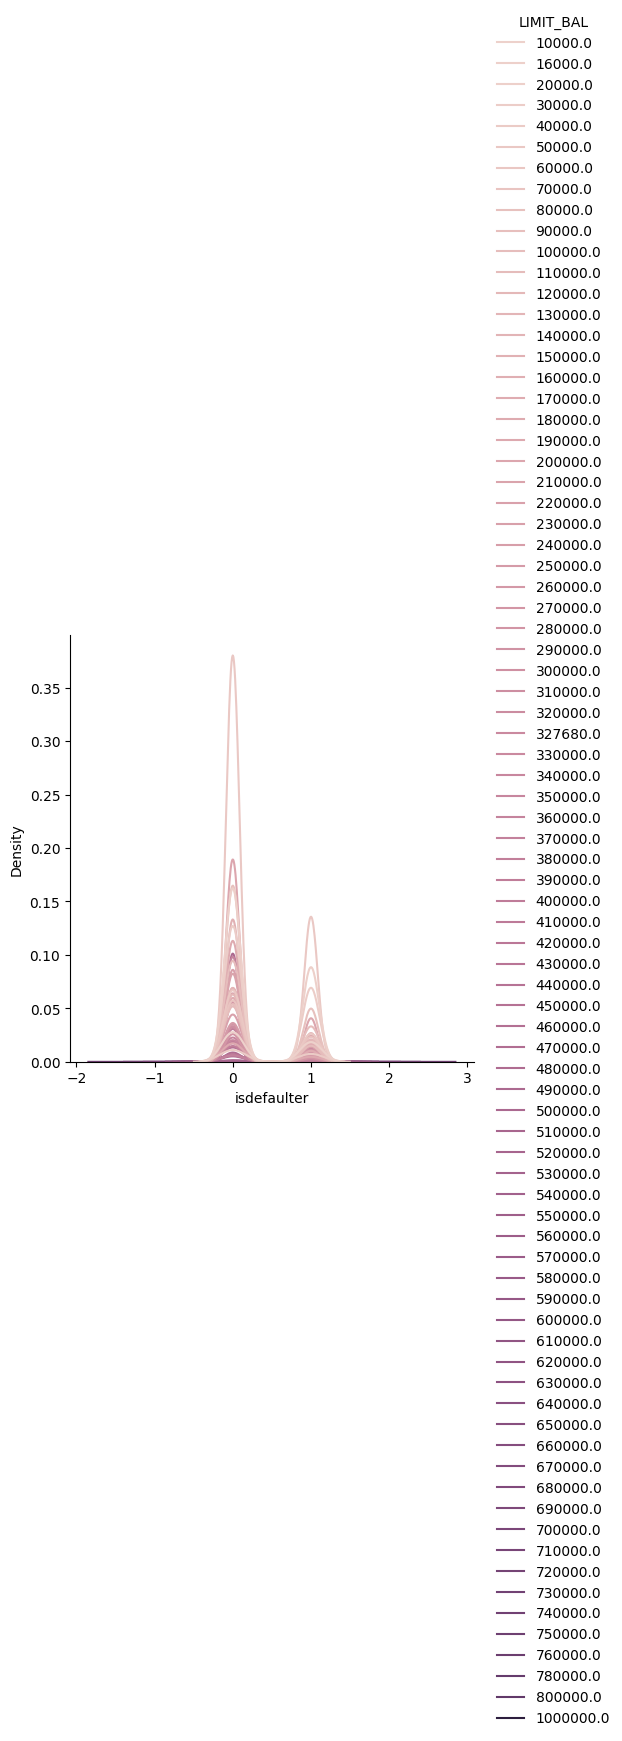

In [ ]:
sns.displot(data=df,x='isdefaulter',hue='LIMIT_BAL',kind='kde')

In [ ]:
#renaming columns
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isdefaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


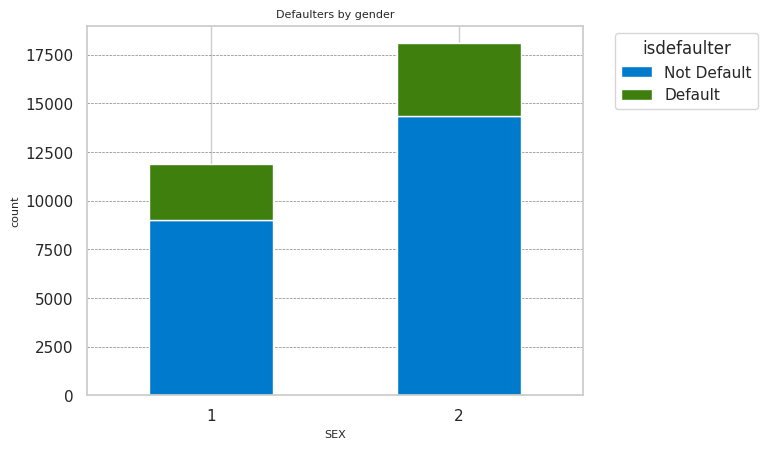

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)


gender_crosstab = pd.crosstab(df['SEX'], df['isdefaulter'])
colors = ['#007acc', '#3f7f0e']  # Valid hexadecimal color codes

sns.set(style='whitegrid')
ax = gender_crosstab.plot(kind='bar', stacked=True, color=colors)
ax.set_title('Defaulters by gender', fontsize=8)
ax.set_xlabel('SEX', fontsize=8)
ax.set_ylabel('count', fontsize=8)
plt.xticks(rotation=0)

legend_labels = ['Not Default', 'Default']
legend = plt.legend(legend_labels, title='isdefaulter', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.grid(which='both', color='grey', linestyle='--', linewidth=0.5)

plt.show()


In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'isdefaulter'],
      dtype='object')

In [ ]:
df['AGE']=df['AGE'].astype('int')

In [ ]:
df_new=df.copy()

In [ ]:
df_new.replace({'SEX': {1: 'MALE', 2: 'FEMALE'},
                'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'},
                'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace=True)

In [ ]:
df_new.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isdefaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,FEMALE,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,FEMALE,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,FEMALE,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [ ]:
df_new.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isdefaulter
ID,,,,,,,,,,,,,,,,,,,,,
23055,230000.0,FEMALE,graduate school,single,28,-1,2,0,0,0,...,22515.0,20109.0,13700.0,0.0,27446.0,1400.0,0.0,274.0,0.0,0
13599,190000.0,FEMALE,university,married,33,1,-2,-2,-2,-2,...,-3000.0,-3000.0,-3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12351,20000.0,MALE,university,single,21,0,0,0,-2,-2,...,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0
15830,30000.0,FEMALE,university,married,27,0,0,0,0,0,...,27831.0,14215.0,32635.0,1500.0,1938.0,2000.0,505.0,25000.0,1229.0,0
6209,220000.0,MALE,university,married,46,2,0,0,0,0,...,162303.0,164700.0,166756.0,5800.0,5759.0,5938.0,6200.0,6009.0,6044.0,0
4952,20000.0,MALE,high school,married,35,1,2,0,0,0,...,20794.0,19914.0,7476.0,1300.0,1481.0,503.0,2019.0,233.0,100.0,0
7374,360000.0,MALE,university,married,37,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
18449,20000.0,FEMALE,university,married,25,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12456,170000.0,FEMALE,graduate school,single,28,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_new.groupby(['isdefaulter','SEX'])['SEX'].count()

isdefaulter  SEX   
0            FEMALE    14330
             MALE       9005
1            FEMALE     3761
             MALE       2869
Name: SEX, dtype: int64

In [ ]:
df_new.groupby(['isdefaulter','EDUCATION'])['EDUCATION'].count()

isdefaulter  EDUCATION      
0            graduate school     8531
             high school         3678
             others               435
             university         10691
1            graduate school     2032
             high school         1237
             others                33
             university          3328
Name: EDUCATION, dtype: int64

In [ ]:
df_new.groupby(['isdefaulter','SEX','EDUCATION'])['AGE'].mean()

isdefaulter  SEX     EDUCATION      
0            FEMALE  graduate school    33.023384
                     high school        40.188983
                     others             35.741935
                     university         34.281617
             MALE    graduate school    35.796920
                     high school        40.550173
                     others             36.416667
                     university         35.489652
1            FEMALE  graduate school    33.046099
                     high school        40.570809
                     others             35.000000
                     university         33.944849
             MALE    graduate school    36.574115
                     high school        39.770642
                     others             42.642857
                     university         35.742532
Name: AGE, dtype: float64

In [ ]:
df_new.groupby(['isdefaulter'])['AGE'].mean()

isdefaulter
0    35.421041
1    35.723529
Name: AGE, dtype: float64

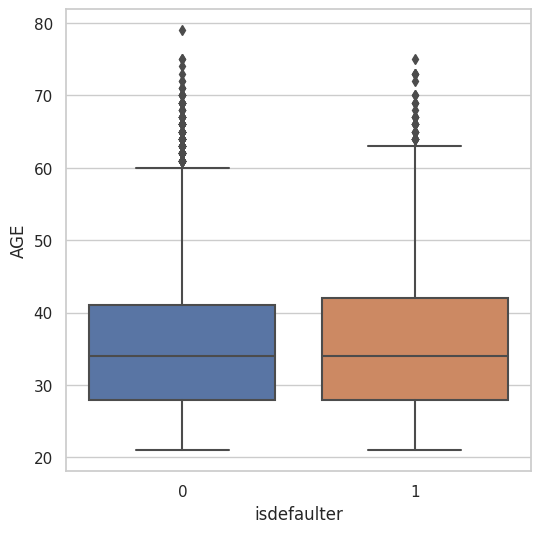

In [ ]:
plt.figure(figsize=(6,6))
ax=sns.boxplot(x='isdefaulter',y='AGE',data=df)

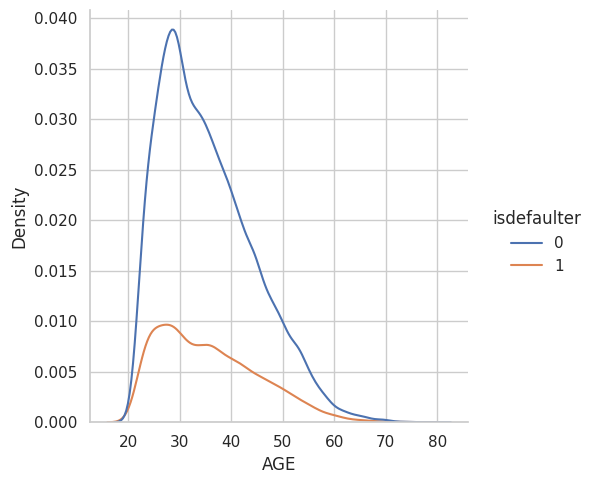

In [ ]:
sns.displot(data=df,x='AGE',hue='isdefaulter',kind='kde')

###### Bill Amount

In [ ]:
bill_amt_df=df[['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']]

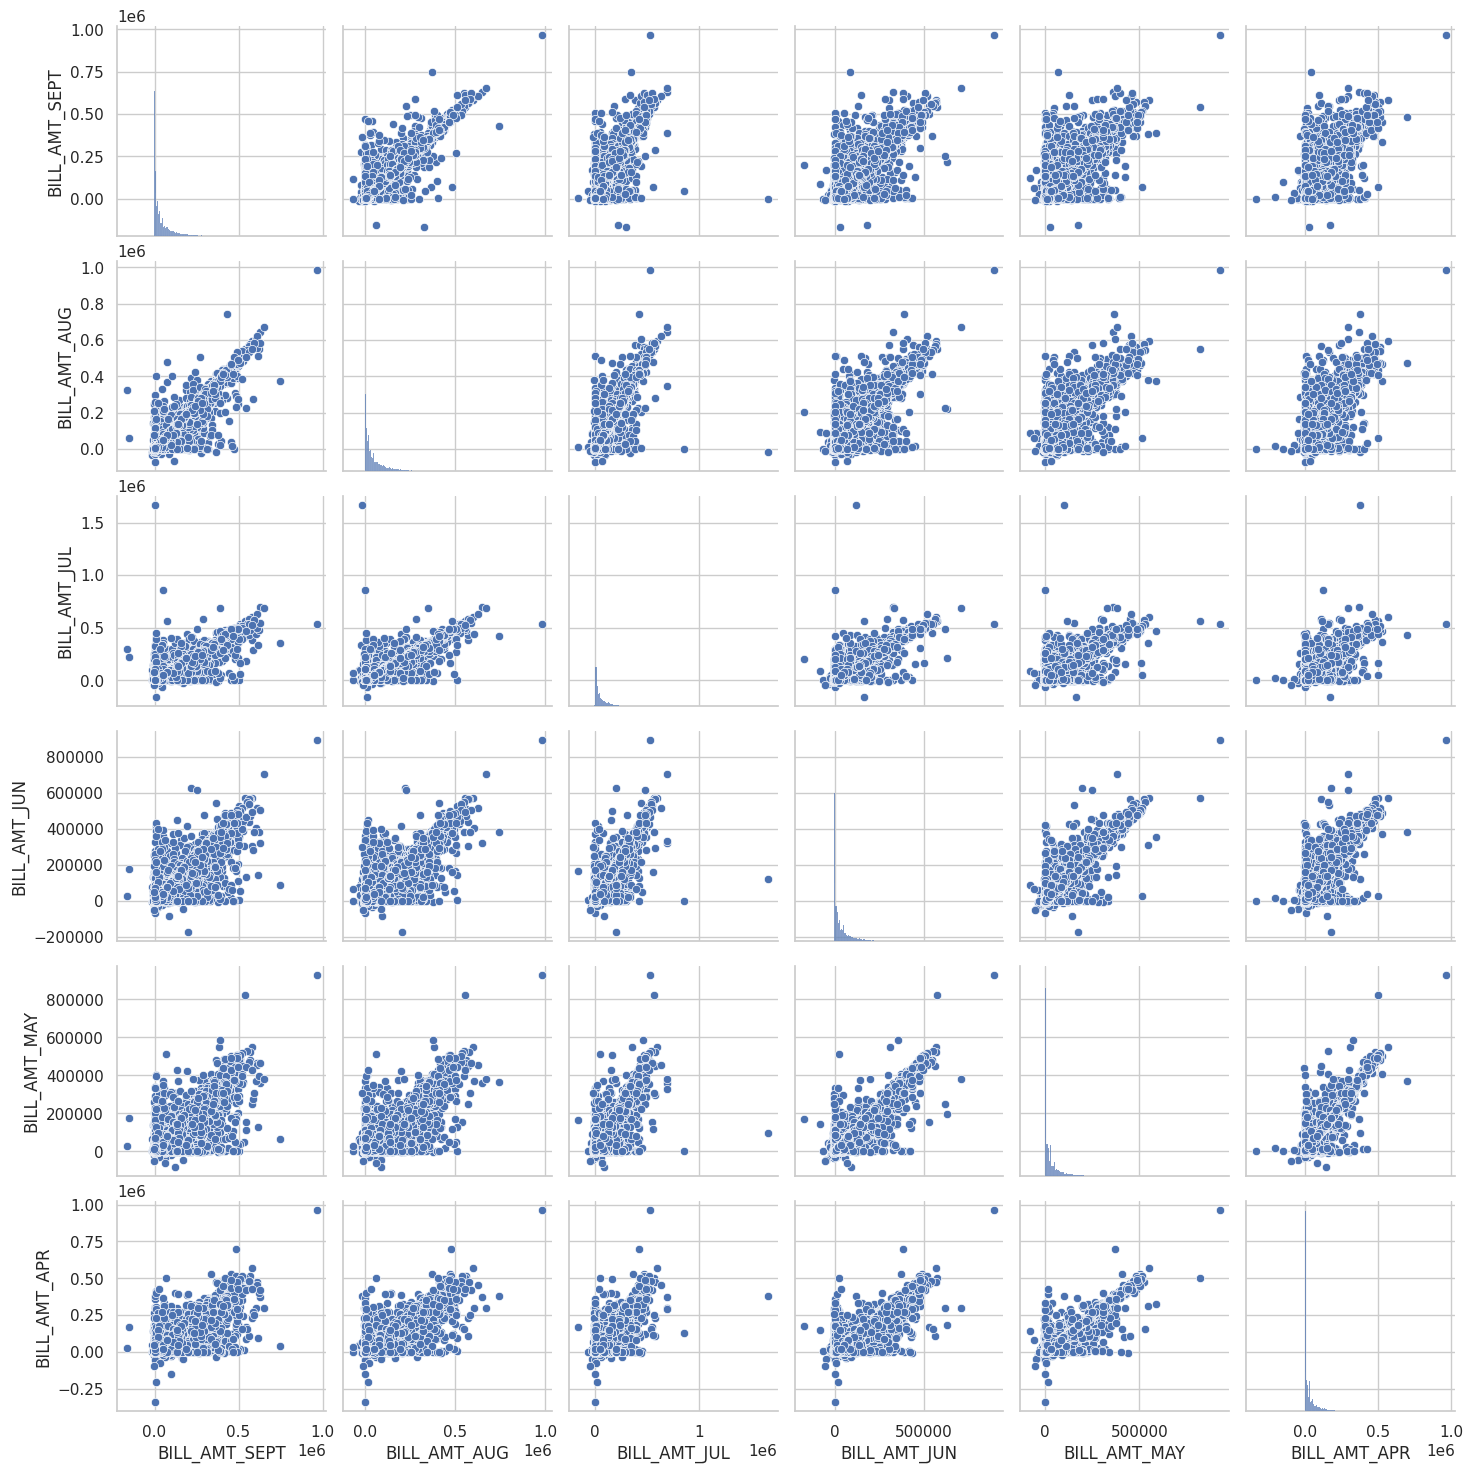

In [ ]:
sns.pairplot(bill_amt_df)

<Axes: xlabel='BILL_AMT_SEPT', ylabel='Count'>

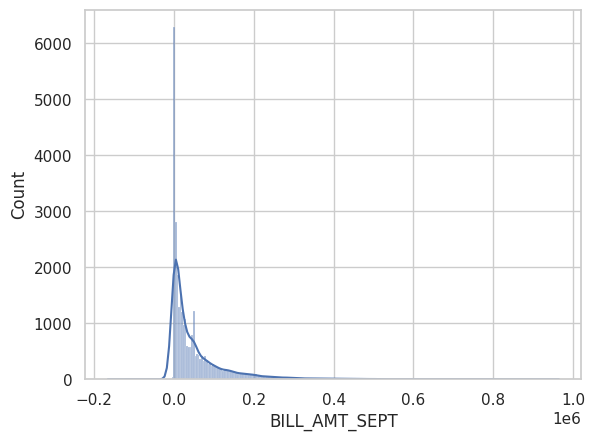

In [ ]:
sns.histplot(data=bill_amt_df,x='BILL_AMT_SEPT',kde=True)

In [ ]:
bill_amt_df.corr()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
BILL_AMT_SEPT,1.000000,0.951457,0.892220,0.860196,0.829688,0.802547
BILL_AMT_AUG,0.951457,1.000000,0.928287,0.892424,0.859704,0.831506
BILL_AMT_JUL,0.892220,0.928287,1.000000,0.923929,0.883849,0.853245
BILL_AMT_JUN,0.860196,0.892424,0.923929,1.000000,0.940103,0.900891
BILL_AMT_MAY,0.829688,0.859704,0.883849,0.940103,1.000000,0.946170
BILL_AMT_APR,0.802547,0.831506,0.853245,0.900891,0.946170,1.000000


###### Pay Amount

In [ ]:
pay_amt_df=df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]

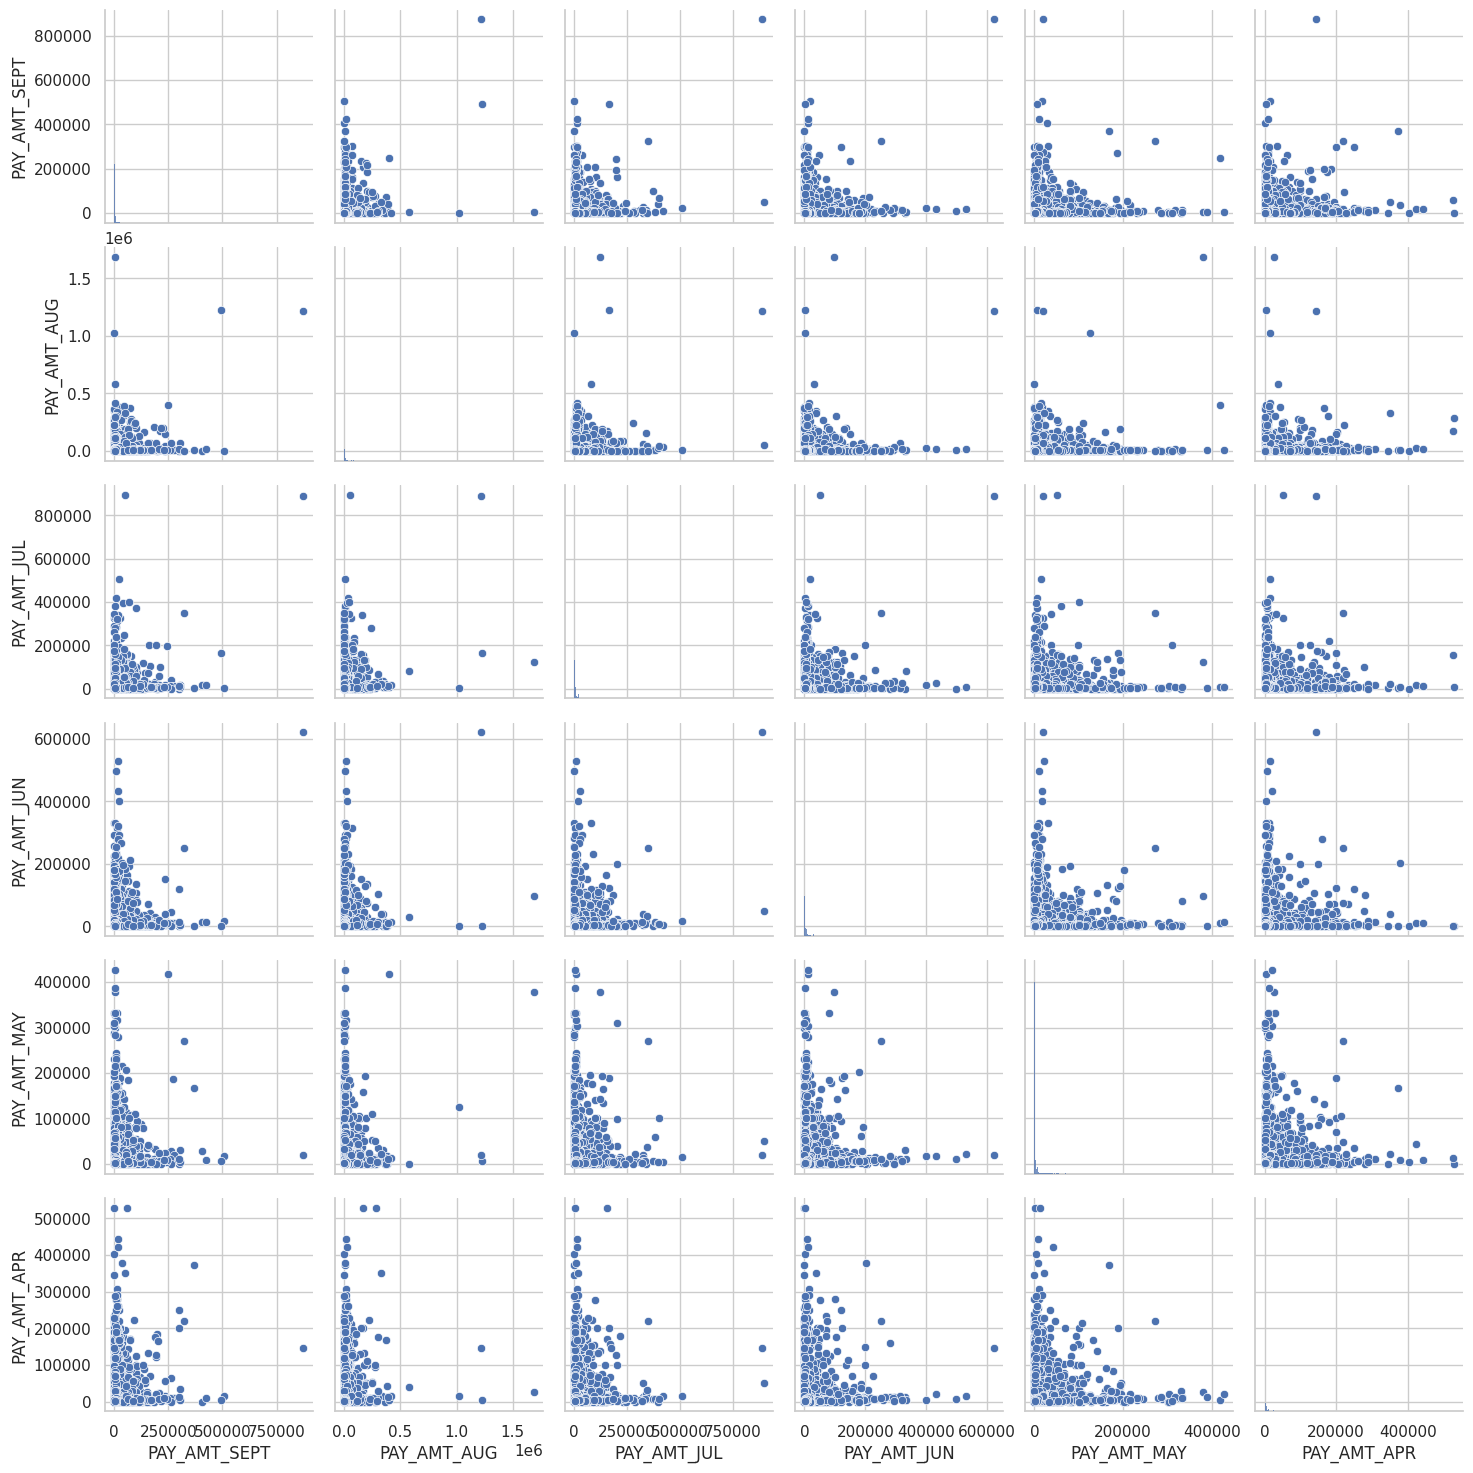

In [ ]:
sns.pairplot(pay_amt_df)

In [ ]:
pay_amt_df.corr()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
PAY_AMT_SEPT,1.000000,0.285505,0.252105,0.199462,0.148356,0.185643
PAY_AMT_AUG,0.285505,1.000000,0.244705,0.180033,0.180833,0.157562
PAY_AMT_JUL,0.252105,0.244705,1.000000,0.216244,0.159125,0.162657
PAY_AMT_JUN,0.199462,0.180033,0.216244,1.000000,0.151738,0.157748
PAY_AMT_MAY,0.148356,0.180833,0.159125,0.151738,1.000000,0.154807
PAY_AMT_APR,0.185643,0.157562,0.162657,0.157748,0.154807,1.000000


###### History payment status

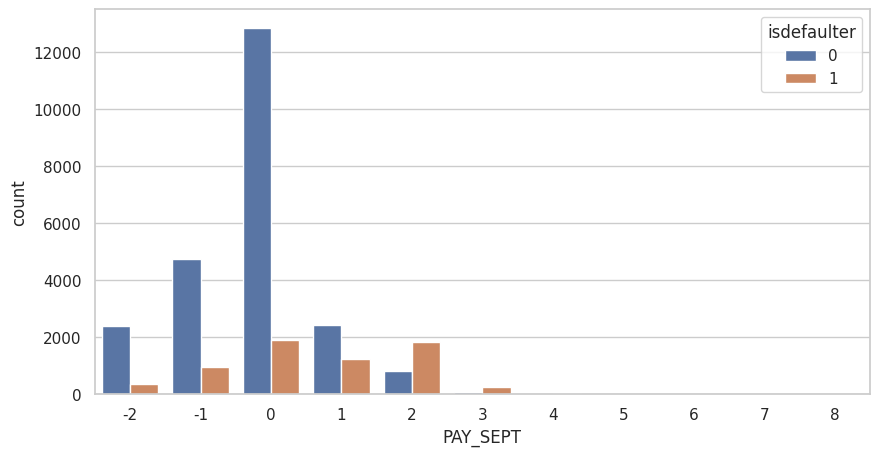

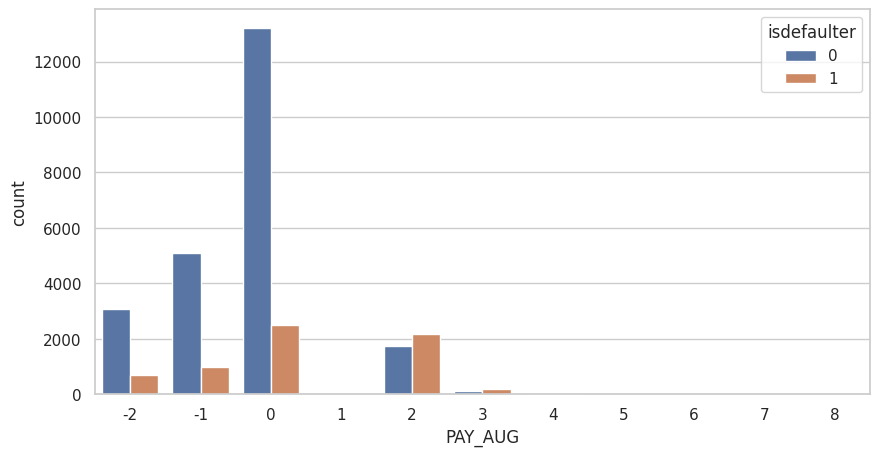

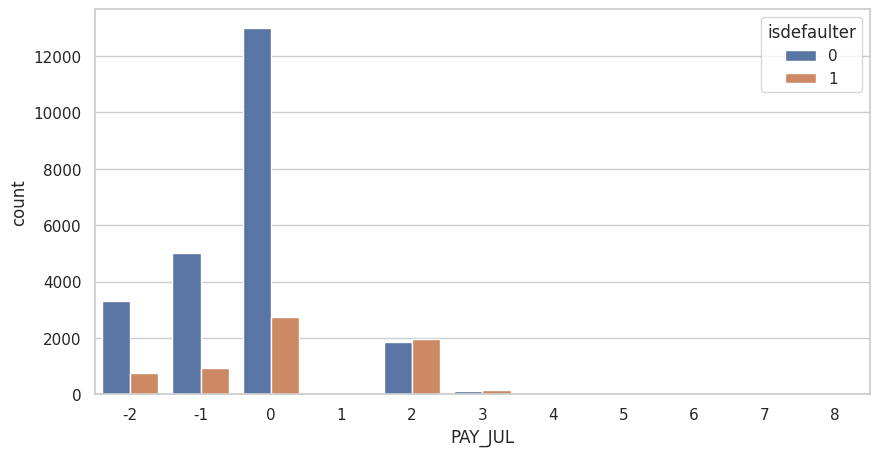

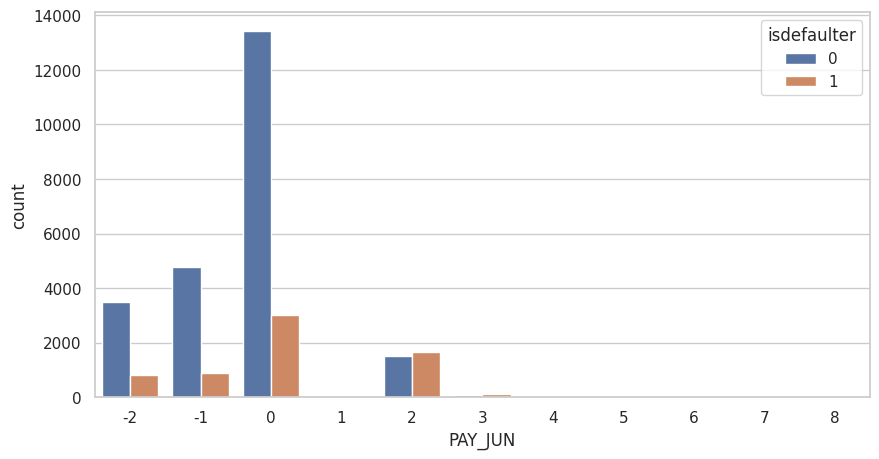

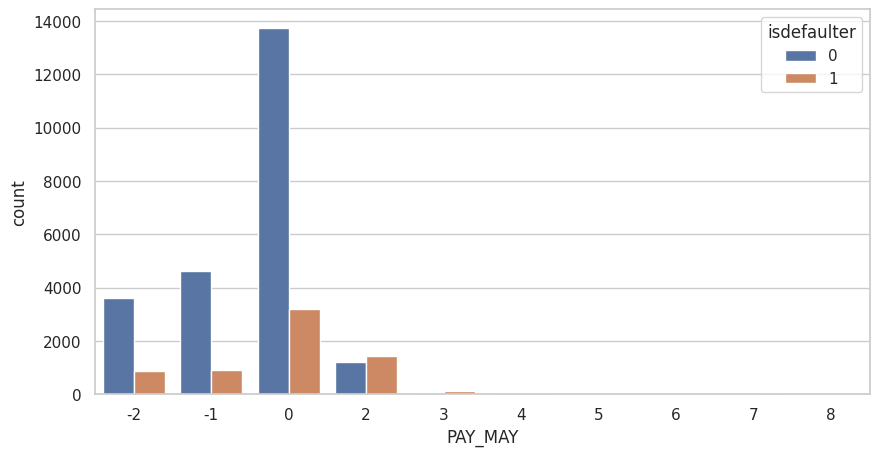

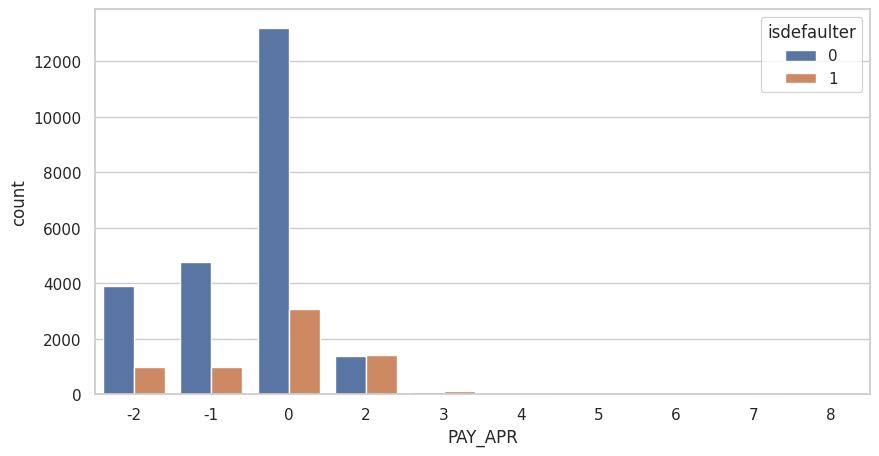

In [ ]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'isdefaulter', data = df)

In [ ]:
X = df.drop(['isdefaulter'],axis=1)
y = df['isdefaulter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23972, 23), (5993, 23), (23972,), (5993,))

### Feature Engineering

##### As we have seen earlier that we have imbalanced dataset.so to remediate imbalance we are using SMOTE TOMEK

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train )

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 23972
Resampled dataset shape 36268


In [ ]:
y_smote.value_counts()

0    18134
1    18134
Name: isdefaulter, dtype: int64

In [ ]:
X_smote

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,300000.000000,1,2,1,35,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,50000.000000,2,3,3,37,2,2,2,2,2,...,49325.000000,48033.000000,27019.000000,26450.000000,2300.000000,1500.000000,0.000000,3400.000000,0.000000,1200.000000
2,80000.000000,1,1,2,23,-1,-1,-1,-1,0,...,444.000000,888.000000,888.000000,444.000000,444.000000,444.000000,888.000000,444.000000,0.000000,1038.000000
3,50000.000000,2,2,2,26,-1,-1,-1,-1,-1,...,390.000000,390.000000,0.000000,780.000000,2078.000000,390.000000,390.000000,0.000000,780.000000,0.000000
4,200000.000000,1,2,2,30,-2,-2,-2,-2,-2,...,24753.000000,123439.000000,132269.000000,129224.000000,20294.000000,24891.000000,125171.000000,17816.000000,26269.000000,4349.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,50000.000000,1,2,1,37,0,0,0,0,0,...,45751.881575,46912.908177,47265.498297,48592.770694,1937.349801,2062.650199,2000.000000,2000.000000,2000.000000,1874.699601
36264,160000.000000,2,1,1,45,1,-1,-1,-1,-2,...,39.711642,0.000000,0.000000,0.000000,166.746195,0.000000,0.000000,0.000000,0.000000,0.000000
36265,20000.000000,1,3,1,46,1,0,0,0,0,...,19592.486625,20091.765176,19765.928341,3683.061560,1042.992797,1658.158279,1008.493804,365.849781,119.543021,710.945342
36266,242889.335867,2,2,1,32,1,0,0,0,1,...,31464.060764,33704.229771,33641.061981,35322.284923,2165.915496,2271.036615,2768.169007,711.066413,2237.022138,6814.889311


In [ ]:
y_smote

0        0
1        1
2        0
3        0
4        1
        ..
36263    1
36264    1
36265    1
36266    1
36267    1
Name: isdefaulter, Length: 36268, dtype: int64

In [ ]:
smote_df=X_smote.copy()

In [ ]:
smote_df['isdefaulter']=y_smote

In [ ]:
smote_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isdefaulter
0,300000.000000,1,2,1,35,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,50000.000000,2,3,3,37,2,2,2,2,2,...,48033.000000,27019.000000,26450.000000,2300.000000,1500.000000,0.000000,3400.000000,0.000000,1200.000000,1
2,80000.000000,1,1,2,23,-1,-1,-1,-1,0,...,888.000000,888.000000,444.000000,444.000000,444.000000,888.000000,444.000000,0.000000,1038.000000,0
3,50000.000000,2,2,2,26,-1,-1,-1,-1,-1,...,390.000000,0.000000,780.000000,2078.000000,390.000000,390.000000,0.000000,780.000000,0.000000,0
4,200000.000000,1,2,2,30,-2,-2,-2,-2,-2,...,123439.000000,132269.000000,129224.000000,20294.000000,24891.000000,125171.000000,17816.000000,26269.000000,4349.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,50000.000000,1,2,1,37,0,0,0,0,0,...,46912.908177,47265.498297,48592.770694,1937.349801,2062.650199,2000.000000,2000.000000,2000.000000,1874.699601,1
36264,160000.000000,2,1,1,45,1,-1,-1,-1,-2,...,0.000000,0.000000,0.000000,166.746195,0.000000,0.000000,0.000000,0.000000,0.000000,1
36265,20000.000000,1,3,1,46,1,0,0,0,0,...,20091.765176,19765.928341,3683.061560,1042.992797,1658.158279,1008.493804,365.849781,119.543021,710.945342,1
36266,242889.335867,2,2,1,32,1,0,0,0,1,...,33704.229771,33641.061981,35322.284923,2165.915496,2271.036615,2768.169007,711.066413,2237.022138,6814.889311,1


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'isdefaulter'

In [ ]:
balance_df = pd.DataFrame(X_smote, columns=columns)


In [ ]:
balance_df['isdefaulter'] = y_smote

In [ ]:
balance_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isdefaulter
0,300000.000000,1,2,1,35,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,50000.000000,2,3,3,37,2,2,2,2,2,...,48033.000000,27019.000000,26450.000000,2300.000000,1500.000000,0.000000,3400.000000,0.000000,1200.000000,1
2,80000.000000,1,1,2,23,-1,-1,-1,-1,0,...,888.000000,888.000000,444.000000,444.000000,444.000000,888.000000,444.000000,0.000000,1038.000000,0
3,50000.000000,2,2,2,26,-1,-1,-1,-1,-1,...,390.000000,0.000000,780.000000,2078.000000,390.000000,390.000000,0.000000,780.000000,0.000000,0
4,200000.000000,1,2,2,30,-2,-2,-2,-2,-2,...,123439.000000,132269.000000,129224.000000,20294.000000,24891.000000,125171.000000,17816.000000,26269.000000,4349.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,50000.000000,1,2,1,37,0,0,0,0,0,...,46912.908177,47265.498297,48592.770694,1937.349801,2062.650199,2000.000000,2000.000000,2000.000000,1874.699601,1
36264,160000.000000,2,1,1,45,1,-1,-1,-1,-2,...,0.000000,0.000000,0.000000,166.746195,0.000000,0.000000,0.000000,0.000000,0.000000,1
36265,20000.000000,1,3,1,46,1,0,0,0,0,...,20091.765176,19765.928341,3683.061560,1042.992797,1658.158279,1008.493804,365.849781,119.543021,710.945342,1
36266,242889.335867,2,2,1,32,1,0,0,0,1,...,33704.229771,33641.061981,35322.284923,2165.915496,2271.036615,2768.169007,711.066413,2237.022138,6814.889311,1


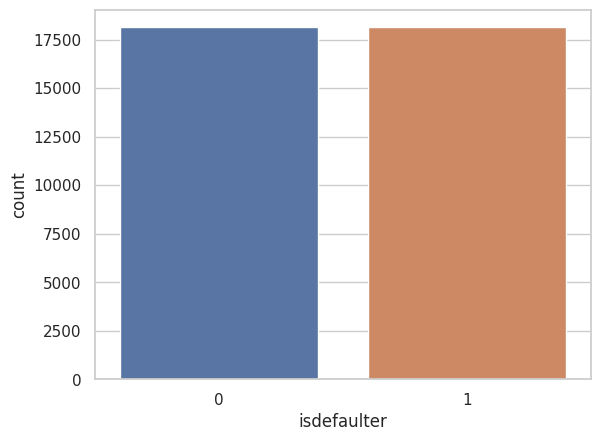

In [ ]:
sns.countplot(x='isdefaulter', data=balance_df)
plt.show()

In [ ]:
balance_df[balance_df['isdefaulter']==1]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,isdefaulter
1,50000.000000,2,3,3,37,2,2,2,2,2,...,48033.000000,27019.000000,26450.000000,2300.000000,1500.000000,0.000000,3400.000000,0.000000,1200.000000,1
4,200000.000000,1,2,2,30,-2,-2,-2,-2,-2,...,123439.000000,132269.000000,129224.000000,20294.000000,24891.000000,125171.000000,17816.000000,26269.000000,4349.000000,1
6,300000.000000,2,3,1,32,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
14,310000.000000,2,1,2,32,-2,-2,-2,-2,-2,...,8543.000000,1695.000000,750.000000,8267.000000,66008.000000,8543.000000,1695.000000,750.000000,7350.000000,1
20,30000.000000,2,2,1,29,1,2,2,2,0,...,28700.000000,28300.000000,25520.000000,0.000000,3500.000000,0.000000,0.000000,1000.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,50000.000000,1,2,1,37,0,0,0,0,0,...,46912.908177,47265.498297,48592.770694,1937.349801,2062.650199,2000.000000,2000.000000,2000.000000,1874.699601,1
36264,160000.000000,2,1,1,45,1,-1,-1,-1,-2,...,0.000000,0.000000,0.000000,166.746195,0.000000,0.000000,0.000000,0.000000,0.000000,1
36265,20000.000000,1,3,1,46,1,0,0,0,0,...,20091.765176,19765.928341,3683.061560,1042.992797,1658.158279,1008.493804,365.849781,119.543021,710.945342,1
36266,242889.335867,2,2,1,32,1,0,0,0,1,...,33704.229771,33641.061981,35322.284923,2165.915496,2271.036615,2768.169007,711.066413,2237.022138,6814.889311,1


#### Creating a pipeline for preprocessing steps like encoding and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
def create_custom_pipeline(categorical_cols, numerical_cols, scaling_method=None):
    # Define transformers for categorical and numerical columns
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False, drop="first", handle_unknown='ignore'))])

    if scaling_method:
        if scaling_method == 'standard':
            numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        elif scaling_method == 'robust':
            numerical_transformer = Pipeline(steps=[('scaler', RobustScaler())])
        elif scaling_method == 'minmax':
            numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    else:
        numerical_transformer = "passthrough"

    # Specify which columns to apply each transformer to
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Include the preprocessor in your main pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    return pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
numerical_cols = [col for col in X_smote.columns if col not in categorical_cols]

# Applying the pipeine to categorical and numerical columns if required
pipeline = create_custom_pipeline(categorical_cols, numerical_cols,scaling_method='robust')


# Fit and transform the data
X_preprocessed_train = pipeline.fit_transform(X_smote)
X_preprocessed_test = pipeline.transform(X_test)

## Building the Model

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, hyperparameters={}):
    """
    Evaluate a machine learning model with hyperparameters.

    Parameters:
    - model: The machine learning model to be trained and evaluated.
    - X_train: Features of the training set.
    - X_test: Features of the testing set.
    - y_train: Target labels of the training set.
    - y_test: Target labels of the testing set.
    - hyperparameters: Dictionary of hyperparameters for the model.

    Returns:
    - A dictionary containing evaluation metrics for both training and testing sets, as well as predicted labels.
    """
    # Initialize and configure the model with hyperparameters
    model.set_params(**hyperparameters)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_score = roc_auc_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_score = roc_auc_score(y_test, y_test_pred)

    # Create a dictionary to store the results
    evaluation_results = {
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1 Score': train_f1,
        'Train ROC AUC Score': train_roc_score,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1 Score': test_f1,
        'Test ROC AUC Score': test_roc_score,
        'y_pred_train': y_train_pred,
        'y_pred_test': y_test_pred
    }

    return evaluation_results

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels = ['Not Defaulter', 'Defaulter']):
    """
    Plots a confusion matrix using seaborn.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        labels: List of class labels.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    # Add labels and title
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")

    # Display the plot
    plt.show()

#### EXPERIMENT 1

#### Implementing Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
results_lr = evaluate_model(logistic_model,X_preprocessed_train, X_preprocessed_test, y_smote, y_test)
results_lr

{'Train Accuracy': 0.7546597551560604,
 'Train Precision': 0.7916508778577744,
 'Train Recall': 0.6912429690084924,
 'Train F1 Score': 0.7380475741874707,
 'Train ROC AUC Score': 0.7546597551560604,
 'Test Accuracy': 0.7505422993492408,
 'Test Precision': 0.44429795649307846,
 'Test Recall': 0.5082956259426847,
 'Test F1 Score': 0.47414702778754836,
 'Test ROC AUC Score': 0.6638328354697354,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 1])}

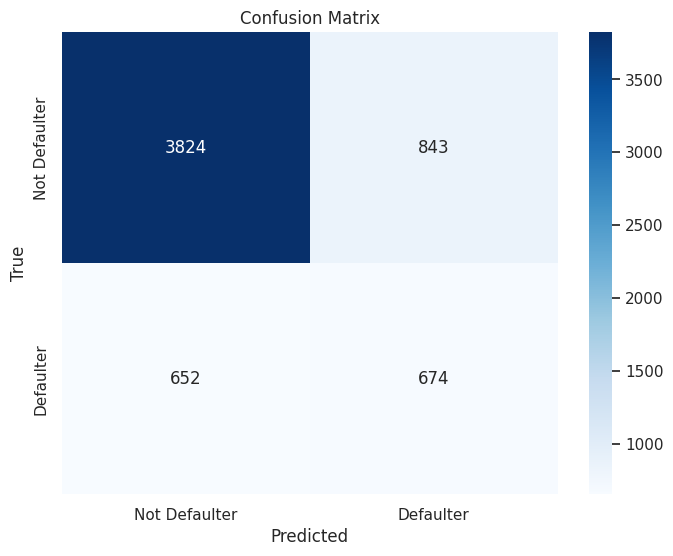

In [ ]:
plot_confusion_matrix(y_test, results_lr['y_pred_test'])

##### Hyper Parameter Tuning for Logistic Regression

In [ ]:
pipeline = create_custom_pipeline(categorical_cols, numerical_cols,scaling_method='robust')

# Fit and transform the data
X_preprocessed_train = pipeline.fit_transform(X_smote)
X_preprocessed_test = pipeline.transform(X_test)

In [ ]:
#Applying GridSeachCV method

param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4, cv = 5)
grid_lr_clf.fit(X_preprocessed_train, y_smote)
optimized_clf = grid_lr_clf.best_estimator_
optimized_params = grid_lr_clf.best_params_

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [ ]:
#Applying RandomSearchCV method


param_grid = {'penalty':['l1','l2','elasticnet', None], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
random_lr_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, scoring='accuracy', n_jobs=-1, verbose=4, cv=5, n_iter=10)
random_lr_clf.fit(X_preprocessed_train, y_smote)
optimized_clf = random_lr_clf.best_estimator_
optimized_params = random_lr_clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#Applying Hyperparameter tuning  on Logistic Regression

logistic_model = LogisticRegression()
hp = optimized_params
results_lrh = evaluate_model(model=logistic_model, X_train=X_preprocessed_train, X_test=X_preprocessed_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
results_lrh

{'Train Accuracy': 0.7544391750303298,
 'Train Precision': 0.7902617010568697,
 'Train Recall': 0.6927318848571744,
 'Train F1 Score': 0.7382897443432266,
 'Train ROC AUC Score': 0.7544391750303296,
 'Test Accuracy': 0.7495411313198732,
 'Test Precision': 0.44284781188765515,
 'Test Recall': 0.5113122171945701,
 'Test F1 Score': 0.4746237311865593,
 'Test ROC AUC Score': 0.6642697790493955,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 1])}

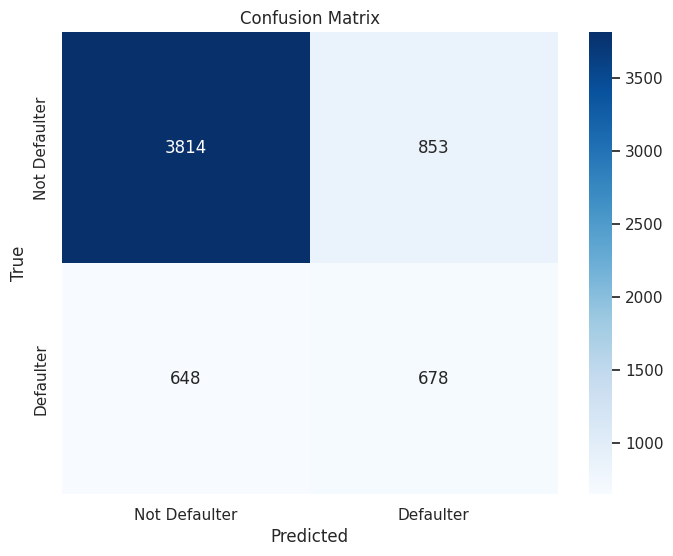

In [ ]:
plot_confusion_matrix(y_test, results_lrh['y_pred_test'])

### Experiment 2

#### Decision tree

In [ ]:
dt_classifier = DecisionTreeClassifier()
results_dt = evaluate_model(dt_classifier,X_smote, X_test, y_smote, y_test)
results_dt

{'Train Accuracy': 0.9995312672328224,
 'Train Precision': 0.9998344644926337,
 'Train Recall': 0.9992279695599426,
 'Train F1 Score': 0.9995311250241332,
 'Train ROC AUC Score': 0.9995312672328224,
 'Test Accuracy': 0.6874687134990822,
 'Test Precision': 0.35030103995621237,
 'Test Recall': 0.48265460030165913,
 'Test F1 Score': 0.4059625753250872,
 'Test ROC AUC Score': 0.6141578122571077,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 0, 0, ..., 1, 0, 0])}

###### Random searchcv

In [ ]:
from scipy.stats import randint

In [ ]:
# Define the hyperparameter grid for Decision Tree
param_dist = {
    'max_depth': randint(1, 20),      # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}


# Initialize RandomizedSearchCV
random_dt = RandomizedSearchCV(
    dt_classifier, param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    scoring='accuracy',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Set to 1 for progress updates
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your training data
random_dt.fit(X_smote, y_smote)
optimized_clf = random_dt.best_estimator_
optimized_params = random_dt.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
random_dt.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [ ]:
#Applying Hyperparameter tuning  on Decision tree

dt_classifier = DecisionTreeClassifier()
hp = optimized_params
results_dth = evaluate_model(model=dt_classifier, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
results_dth

{'Train Accuracy': 0.8778537553766406,
 'Train Precision': 0.8812173138978524,
 'Train Recall': 0.8734421528620271,
 'Train F1 Score': 0.8773125069236734,
 'Train ROC AUC Score': 0.8778537553766407,
 'Test Accuracy': 0.7133322209244118,
 'Test Precision': 0.3893905191873589,
 'Test Recall': 0.5203619909502263,
 'Test F1 Score': 0.44544867656552617,
 'Test ROC AUC Score': 0.6442607040673565,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 1])}

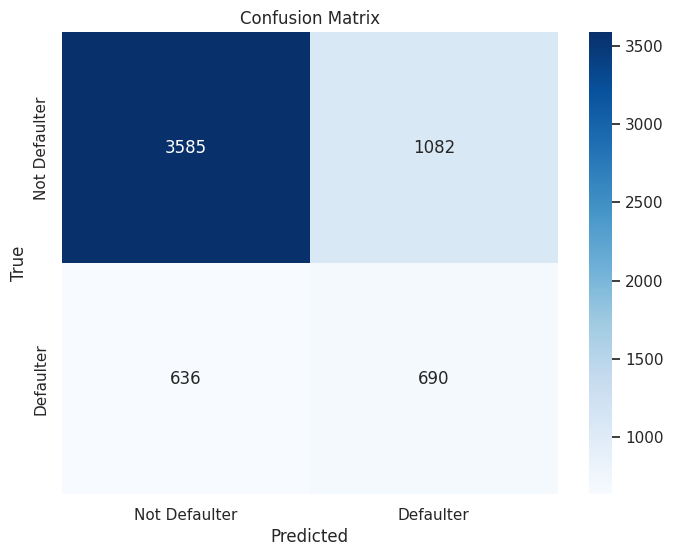

In [ ]:
plot_confusion_matrix(y_test, results_dth['y_pred_test'])

### Experiment 3

###### Random forest

In [ ]:
rf_clf = RandomForestClassifier()
results_rf = evaluate_model(rf_clf,X_smote, X_test, y_smote, y_test)
results_rf

{'Train Accuracy': 0.9995312672328224,
 'Train Precision': 0.9993935718617344,
 'Train Recall': 0.999669129811404,
 'Train F1 Score': 0.9995313318446227,
 'Train ROC AUC Score': 0.9995312672328224,
 'Test Accuracy': 0.7802436175538128,
 'Test Precision': 0.5035742652899127,
 'Test Recall': 0.4781297134238311,
 'Test F1 Score': 0.4905222437137331,
 'Test ROC AUC Score': 0.6721053538192651,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 0])}

###### Random searchcv

In [ ]:
# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees in the forest
    'max_depth': randint(1, 20),      # Maximum depth of each tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
    'bootstrap': [True, False],  # Whether or not to use bootstrap samples
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist,
    n_iter=10,  # Number of parameter combinations to try
    scoring='accuracy',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Set to 1 for progress updates
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to your training data
random_search.fit(X_smote, y_smote)

# Get the best hyperparameters
RF_best_params = random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#Applying Hyperparameter tuning  on Random Forest

rf_classifier = RandomForestClassifier(random_state=42)
hp = RF_best_params
results_rfh = evaluate_model(model=rf_classifier, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
results_rfh

{'Train Accuracy': 0.9362799161795522,
 'Train Precision': 0.9475083432320832,
 'Train Recall': 0.9237344215286203,
 'Train F1 Score': 0.9354703599251668,
 'Train ROC AUC Score': 0.9362799161795523,
 'Test Accuracy': 0.7729017186717837,
 'Test Precision': 0.48752672843905914,
 'Test Recall': 0.5158371040723982,
 'Test F1 Score': 0.501282521069989,
 'Test ROC AUC Score': 0.6808883399084938,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 0])}

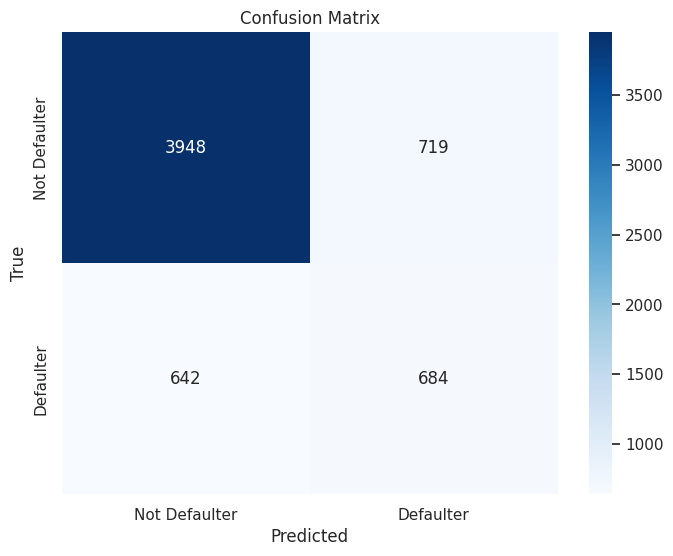

In [ ]:
plot_confusion_matrix(y_test, results_rfh['y_pred_test'])

### Experiment 4

###### 1)Gradient boosting

In [ ]:
gb_classifier = GradientBoostingClassifier()
results_gb = evaluate_model(gb_classifier,X_smote, X_test, y_smote, y_test)
results_gb

{'Train Accuracy': 0.791937796404544,
 'Train Precision': 0.810280154729809,
 'Train Recall': 0.7623800595566339,
 'Train F1 Score': 0.7856006364359587,
 'Train ROC AUC Score': 0.791937796404544,
 'Test Accuracy': 0.7545469714667111,
 'Test Precision': 0.4547158026233604,
 'Test Recall': 0.5490196078431373,
 'Test F1 Score': 0.49743764947044755,
 'Test ROC AUC Score': 0.6809807702811143,
 'y_pred_train': array([1, 1, 1, ..., 1, 1, 1]),
 'y_pred_test': array([0, 0, 0, ..., 0, 0, 1])}

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(50, 200),
    'criterion':['friedman_mse', 'squared_error'],
    'loss':['log_loss', 'exponential'],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'max_features':['sqrt', 'log2']
}

gb_classifier=GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(gb_classifier,param_distributions=param_dist,
    n_iter=100,  # Number of parameter combinations to try
    scoring='recall',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Set to 1 for progress updates
   )
random_search.fit(X_smote, y_smote)
GB_best_params = random_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [124]:
#Applying Hyperparameter tuning  on gradientboosting

gb_classifier = GradientBoostingClassifier()
hp = GB_best_params
results_gbh = evaluate_model(model=gb_classifier, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
results_gbh

{'Train Accuracy': 0.8752895114150215,
 'Train Precision': 0.8887746358183376,
 'Train Recall': 0.8579463990294475,
 'Train F1 Score': 0.8730884704958051,
 'Train ROC AUC Score': 0.8752895114150214,
 'Test Accuracy': 0.7595528116135492,
 'Test Precision': 0.4584837545126354,
 'Test Recall': 0.47888386123680243,
 'Test F1 Score': 0.4684618222058281,
 'Test ROC AUC Score': 0.6590905271472206,
 'y_pred_train': array([1, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 0])}

###### 2)Ada boosting

In [125]:
from sklearn.ensemble import AdaBoostClassifier

In [126]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)
results_ad = evaluate_model(adaboost_classifier,X_smote, X_test, y_smote, y_test)
results_ad



{'Train Accuracy': 0.7577754494320061,
 'Train Precision': 0.7700618175515628,
 'Train Recall': 0.7350281239660307,
 'Train F1 Score': 0.7521372344327512,
 'Train ROC AUC Score': 0.7577754494320061,
 'Test Accuracy': 0.7331887201735358,
 'Test Precision': 0.4215967834577829,
 'Test Recall': 0.5535444947209653,
 'Test F1 Score': 0.47864362569285945,
 'Test ROC AUC Score': 0.6688870962998442,
 'y_pred_train': array([0, 1, 1, ..., 1, 1, 1]),
 'y_pred_test': array([0, 1, 0, ..., 0, 0, 1])}

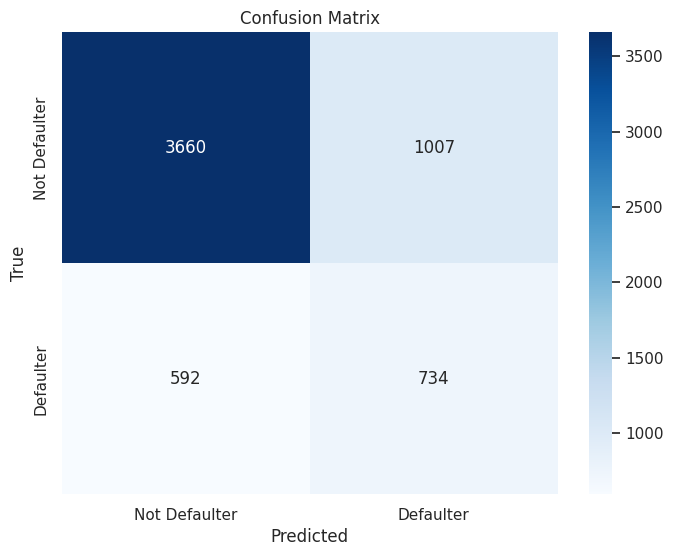

In [127]:
plot_confusion_matrix(y_test, results_ad['y_pred_test'])

In [128]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Use GridSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(adaboost_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_ad =random_search .best_params_



In [129]:
#Applying Hyperparameter tuning  on Adaboosting
adaboost_classifier = AdaBoostClassifier()
hp = best_params_ad
results_adh = evaluate_model(model=adaboost_classifier, X_train=X_smote, X_test=X_test, y_train=y_smote, y_test=y_test, hyperparameters=hp)
results_adh

{'Train Accuracy': 0.6843498400794088,
 'Train Precision': 0.7722312703583062,
 'Train Recall': 0.5229403330759899,
 'Train F1 Score': 0.623594397317025,
 'Train ROC AUC Score': 0.6843498400794088,
 'Test Accuracy': 0.7734023026864676,
 'Test Precision': 0.4887640449438202,
 'Test Recall': 0.5248868778280543,
 'Test F1 Score': 0.5061818181818182,
 'Test ROC AUC Score': 0.6844490099446677,
 'y_pred_train': array([0, 1, 0, ..., 1, 1, 1]),
 'y_pred_test': array([0, 0, 0, ..., 0, 0, 0])}

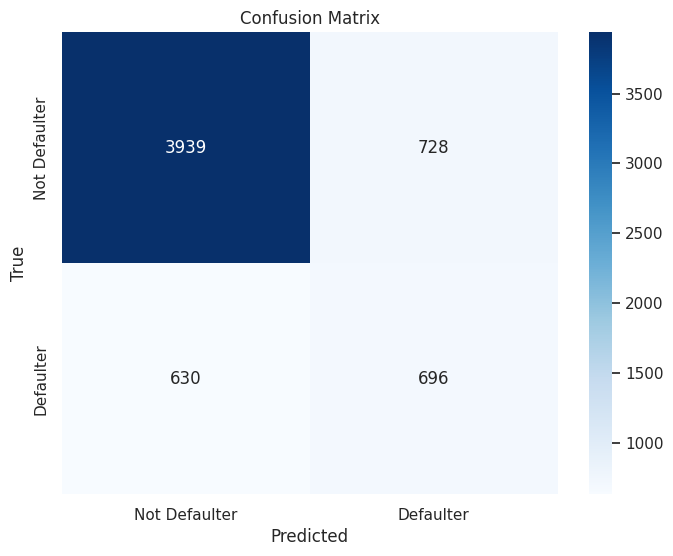

In [130]:
plot_confusion_matrix(y_test, results_adh['y_pred_test'])

In [132]:
from sklearn.metrics import auc

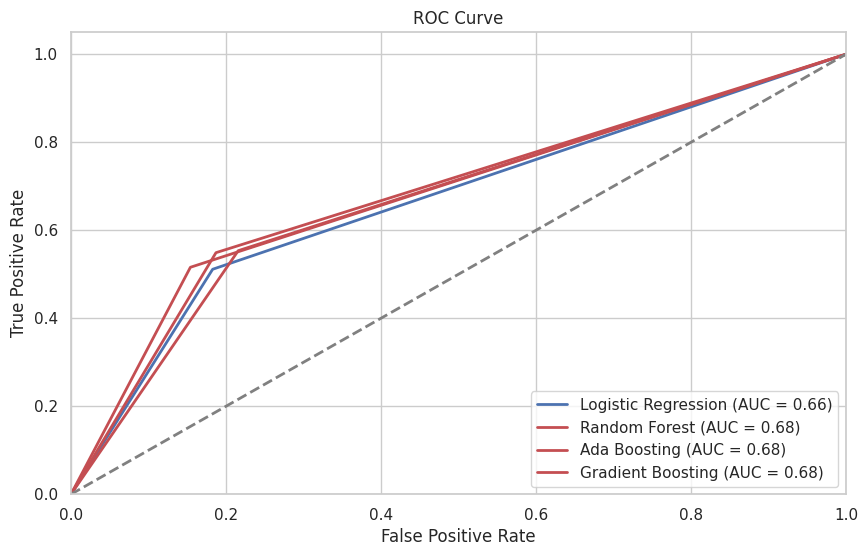

In [133]:
fpr1, tpr1, _ = roc_curve(y_test, results_lrh['y_pred_test'])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, results_rfh['y_pred_test'])
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(y_test, results_ad['y_pred_test'])
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, _ = roc_curve(y_test, results_gb['y_pred_test'])
roc_auc4= auc(fpr4, tpr4)

# Repeat the above steps for model3 and its ROC curve and AUC score
plt.figure(figsize=(10, 6))

plt.plot(fpr1, tpr1, color='b', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='r', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='r', lw=2, label=f'Ada Boosting (AUC = {roc_auc2:.2f})')
plt.plot(fpr4, tpr4, color='r', lw=2, label=f'Gradient Boosting (AUC = {roc_auc2:.2f})')

# Plot the ROC curve for model3 with its AUC score

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [136]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.1 MB/s eta 0:00:00


In [137]:
import dill
data = {"model":adaboost_classifier }   # change the model and pipeline as required
with open ('model_pipeline_object.joblib', 'wb') as file:
    dill.dump(data, file)